# Battle for Riddler Nation!
## Riddler Classic May 19 2017

Simulate [castle game from Riddler](http://fivethirtyeight.com/features/the-battle-for-riddler-nation-round-2/)
Create two classes, a `Player` and a `Castle`. Then we assign the soldiers to the castles and evaluate the result. I'll do 10,000 simulations. 

## Classes

In [106]:
class Player(object):
    def __init__(self, name, assignment, points=0):
        self.name = 'Player {}'.format(name)
        self.assignment = assignment
        self.points=0
        
    def deploy_troops_randomly(self):
        from numpy.random import randint, permutation
        order = []
        soldiers_remaining = 101
        for i in range(10):
            soldiers = randint(0, soldiers_remaining)
            if soldiers > 80:
                soldiers = randint(0, soldiers_remaining-20) # helps to control for large assignments to one base
            order.append(soldiers)
            soldiers_remaining -= soldiers
            if soldiers_remaining < 0:
                remains = 10 - len(order)
                for i in range(remains):
                    order.append(0)
               
        self.assignment = permutation(order)
        return np.array(self.assignment)
            
            
class Castle(object):
    # create the castles for the competition
    def __init__(self, name, points, soldiers_1, soldiers_2):
        self.name = name
        self.points = points
        self.soldiers_1 = soldiers_1
        self.soldiers_2 = soldiers_2
        
    def battle(self, player_1, player_2):
        if self.soldiers_1 > self.soldiers_2:
            player_1.points += self.points
        if self.soldiers_1 < self.soldiers_2:
            player_2.points += self.points
        if self.soldiers_1 == self.soldiers_2:
            player_1.points += self.points/2.0
            player_2.points += self.points/2.0
    def info(self):
        print("Castle Name: {}".format(self.name), "Victory Points: {}".format(self.points), 
              "Player 1 Soldiers: {}".format(self.soldiers_1), "Player 2 Soldiers: {}".format(self.soldiers_2), '\n', sep='\n',)

## Functions and gameplay

In [131]:
def Play_normal(player_1, player_2, verbose=0):
    player_1.points=0
    player_2.points=0
    player_1.deploy_troops_randomly()
    player_2.deploy_troops_randomly()
    player_1_assignment = player_1.assignment
    player_2_assignment = player_2.assignment
    castle_dict = {}
    for i in range(10):
        castle_dict['Castle {}'.format(i+1)] = Castle(name='Castle {}'.format(i+1), points = i+1, soldiers_1=player_1_assignment[i], soldiers_2=player_2_assignment[i])
    for castle in castle_dict.values():
        if verbose>0: castle.info()
        castle.battle(player_1, player_2)
    if verbose>0: 
        print(player_1.name, ":", player_1.points, player_2.name,":", player_2.points)
        if player_1.points>player_2.points: print(player_1.name, 'Wins!')
        elif player_1.points<player_2.points: print(player_2.name, 'Wins!')
        else: print("TIE?!")
    if player_1.points>player_2.points: winner=player_1.name
    if player_1.points<player_2.points: winner=player_2.name
    elif player_1.points==player_2.points: winner = 0
    
    return (player_1_assignment, player_2_assignment, player_1.points, player_2.points, winner)
    
        
def Play_random(player_1, player_2, verbose=0):
    player_1.points=0
    player_2.points=0
    player_1.deploy_troops_randomly()
    player_2.deploy_troops_randomly()
    player_1_assignment = player_1.assignment
    player_2_assignment = player_2.assignment
    castle_dict = {}
    for i in range(10):
        castle_dict['Castle {}'.format(i+1)] = Castle(name='Castle {}'.format(i+1), points = i+1, soldiers_1=player_1_assignment[i], soldiers_2=player_2_assignment[i])
    for castle in castle_dict.values():
        if verbose>0: castle.info()
        castle.battle(player_1, player_2)
    if verbose>0: 
        print(player_1.name, ":", player_1.points, player_2.name,":", player_2.points)
        if player_1.points>player_2.points: print(player_1.name, 'Wins!')
        elif player_1.points<player_2.points: print(player_2.name, 'Wins!')
        else: print("TIE?!")
    if player_1.points>player_2.points: winner=player_1.name
    if player_1.points<player_2.points: winner=player_2.name
    elif player_1.points==player_2.points: winner = 0
    
    return (player_1_assignment, player_2_assignment, player_1.points, player_2.points, winner)
    
def test_strat(player_1, player_2, verbose=0):
    player_1.points=0
    player_2.points=0
    # player_1.deploy_troops_randomly() ## this means we'll compare one distribution against random
    player_2.deploy_troops_randomly()
    player_1_assignment = player_1.assignment
    player_2_assignment = player_2.assignment
    castle_dict = {}
    for i in range(10):
        castle_dict['Castle {}'.format(i+1)] = Castle(name='Castle {}'.format(i+1), points = i+1, soldiers_1=player_1_assignment[i], soldiers_2=player_2_assignment[i])
    for castle in castle_dict.values():
        if verbose>0: castle.info()
        castle.battle(player_1, player_2)
    if verbose>0: 
        print(player_1.name, ":", player_1.points, player_2.name,":", player_2.points)
        if player_1.points>player_2.points: print(player_1.name, 'Wins!')
        elif player_1.points<player_2.points: print(player_2.name, 'Wins!')
        else: print("TIE?!")
    if player_1.points>player_2.points: winner=player_1.name
    if player_1.points<player_2.points: winner=player_2.name
    elif player_1.points==player_2.points: winner = 0
    
    return (player_1_assignment, player_2_assignment, player_1.points, player_2.points, winner)
          

## One simulation

In [121]:
p1 = Player('Adam', None)
p2 = Player('Evil Invader', None)
import numpy as np

In [122]:
Play_random(p1,p2, verbose=0)

(array([ 0, 51, 41,  0,  0,  0,  4,  0,  0,  4]),
 array([ 0,  3,  9, 78,  0,  0,  0,  0, 10,  0]),
 32.0,
 23.0,
 'Player Adam')

## Many simulations

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [124]:
games = {}
for i in range(10000):
    games['game_{}'.format(i)] = Play_random(p1,p2, verbose=0)

In [125]:
df = pd.DataFrame(games).T
df.columns = ['distribution_1', 'distribution_2', 'points_1', 'points_2', 'winner']

In [133]:
df.sample(4)

,distribution_1,distribution_2,points_1,points_2,winner
game_6673,"[0, 24, 4, 0, 4, 0, 0, 44, 2, 22]","[16, 0, 0, 3, 3, 0, 15, 57, 6, 0]",23,32,Player Evil Invader
game_5159,"[13, 62, 0, 22, 0, 0, 0, 3, 0, 0]","[25, 16, 16, 0, 13, 0, 26, 0, 3, 1]",17,38,Player Evil Invader
game_7194,"[0, 14, 19, 0, 0, 2, 36, 1, 6, 22]","[0, 0, 2, 0, 20, 77, 1, 0, 0, 0]",41.5,13.5,Player Adam
game_1711,"[0, 8, 0, 9, 5, 9, 0, 0, 69, 0]","[5, 49, 0, 0, 30, 2, 6, 0, 6, 1]",24.5,30.5,Player Evil Invader


In [127]:
def get_castle_scores(series):
    distribution_set = series.values # get the distribution arrays
    distribuion_dict = {} #store them in a new dict
    for i in range(10):
        distribuion_dict['castle_{}'.format(i+1)] = []
    for distribution in distribution_set:
        for i in range(10):
            distribuion_dict['castle_{}'.format(i+1)].append(distribution[i])
    return distribuion_dict          

In [132]:
player_1_distributions = get_castle_scores(df.distribution_1)
player_2_distributions = get_castle_scores(df.distribution_2)

In [135]:
p1_df = pd.DataFrame(player_1_distributions)
p2_df = pd.DataFrame(player_2_distributions)

In [136]:
p1_df.head()

,castle_1,castle_10,castle_2,castle_3,castle_4,castle_5,castle_6,castle_7,castle_8,castle_9
0,5,0,0,0,33,7,10,3,8,34
1,0,26,0,3,0,0,54,0,15,2
2,4,0,11,1,0,10,4,70,0,0
3,8,0,50,21,0,19,0,0,2,0
4,0,15,72,1,0,0,0,12,0,0


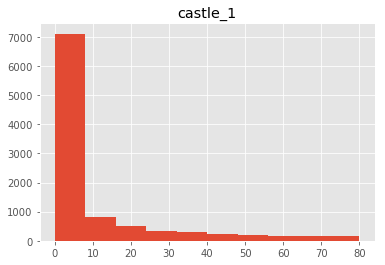

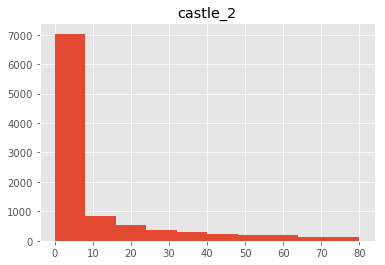

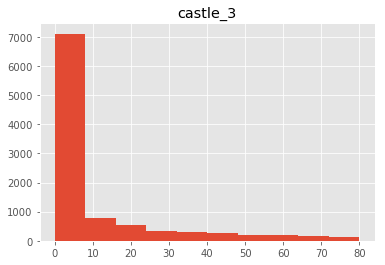

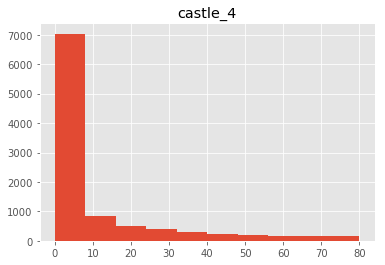

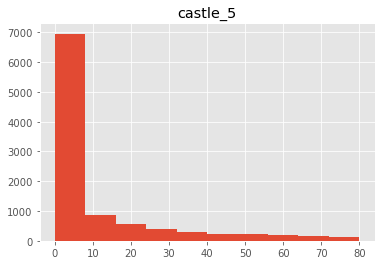

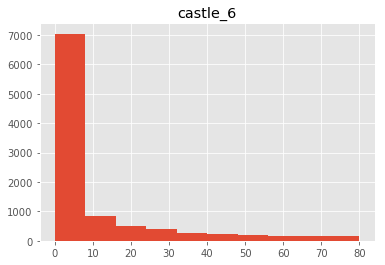

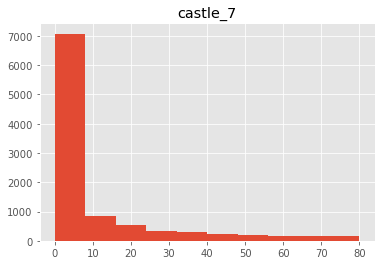

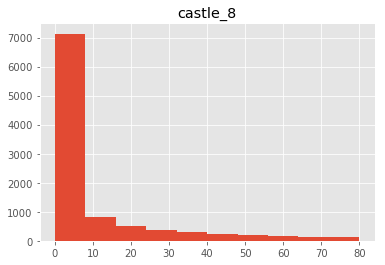

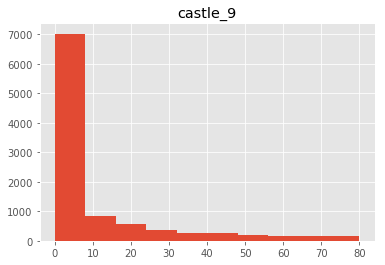

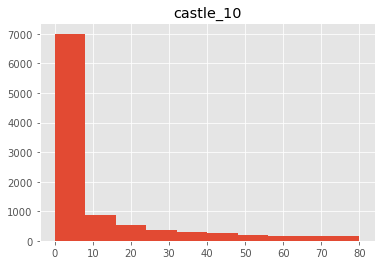

In [139]:
for i in range(10):
    p1_df['castle_{}'.format(i+1)].hist()
    plt.title('castle_{}'.format(i+1))
    plt.show()